# Homework 5 - Gender Differences in University Enrollment

The objective of this homework is to practice visualizing data. To successfully complete this homework, you may use any resources available to you. 

Get the `universities.csv` data. This is data from the [National Center for Education Statistics](https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx). Develop **three** plots:
1. A boxplot of the average number of total enrollment for the states in the U.S. West
    * The States in the U.S. West are
        * Alaska
        * Arizona
        * California
        * Colorado
        * Hawaii
        * Idaho
        * Montana
        * Nevada
        * New Mexico
        * Oregon
        * Utah
        * Washington
        * Wyoming
    * Order the plot based on the number of institutions in the state
2. A boxplot of the average number of enrollment per gender category (hue) and state in the U.S. West
    * Please notice that enrollment numbers for men and women are in two separate columns.
    * Hue requires one column, which means you have to 'melt' the dataset ([Link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)).
    * The results should be a dataframe with two rows (one for men, one for women) for each university
3. A ordered barplot of the ratio of admissions for men and women for universities in the Bay Area
    * We assume that the Bay Area is characterized with zip codes that start with `950` and `94`
    * Focus on institutions with more than 1,000 enrollments.
    * Develop the ratio of admissions for women and for men. Standardize this ratio on the mean. 
4. Interpret you plots in terms of gender differences. 

Hints:
* Make sure your plots are nicely formatted (including axes label).
* Explain what you are doing.
* Use references.

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
%matplotlib inline

In [20]:
import numpy as np
import pandas as pd

In [21]:
universities = pd.read_csv('hd2016.csv', encoding = 'ISO-8859-1')
admissions = pd.read_csv('adm2016.csv', encoding = 'ISO-8859-1')

In [22]:
comb = universities.merge(admissions, on='UNITID', how='left')

In [23]:
comb[['UNITID','INSTNM','ZIP','STABBR','ENRLT', 'ENRLM', 'ENRLW', 'ADMSSNW','ADMSSNM']].to_csv('universities.csv', index=False)

In [24]:
c = students = pd.read_csv('https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
universities.csv')

In [25]:
import seaborn as sn
%matplotlib inline

https://stackoverflow.com/questions/39214484/how-to-rank-plot-in-seaborn-boxplot

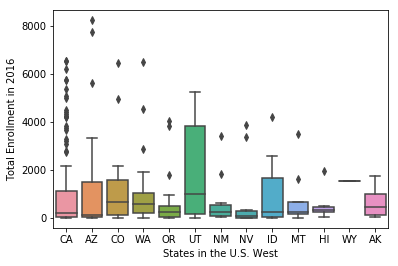

In [26]:
uswest = ['AK','AZ','CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

order = c[c['STABBR'].isin(uswest)].groupby('STABBR')["UNITID"].count().sort_values(ascending=False).index

te = sn.boxplot(x='STABBR', y='ENRLT', data=c[c['STABBR'].isin(uswest)], order=order)

te.set(xlabel='States in the U.S. West', ylabel='Total Enrollment in 2016');

In [27]:
g =c[c['STABBR'].isin(uswest)][['UNITID','INSTNM','STABBR','ENRLT', 'ENRLM', 'ENRLW']].copy()

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

In [28]:
gm = pd.melt(g, id_vars=['UNITID', 'INSTNM', 'STABBR', 'ENRLT'], value_vars=['ENRLM','ENRLW'])
gm['variable'] = gm['variable'].replace({'ENRLM':'Men', 'ENRLW':'Women'})

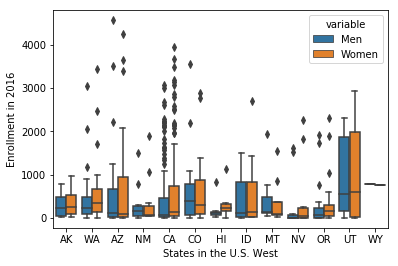

In [29]:
mw = sn.boxplot(x='STABBR', y='value', hue='variable' ,data=gm)
mw.set(xlabel='States in the U.S. West', ylabel='Enrollment in 2016');

In [54]:
ca = c[c['STABBR']=='CA']

In [55]:
adm = ca[((ca['ZIP'].str.startswith('950')) | (ca['ZIP'].str.startswith('94') )) & (ca['ENRLT'] > 1000)].copy()

In [56]:
adm['ADM_RATIO'] = adm['ADMSSNW']/adm['ADMSSNM']
adm

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM,ADM_RATIO
241,110574,California State University-East Bay,94542,CA,1596.0,588.0,1008.0,7039.0,3891.0,1.809047
246,110635,University of California-Berkeley,94720,CA,6182.0,2997.0,3185.0,7766.0,6209.0,1.250765
254,110714,University of California-Santa Cruz,95064-1011,CA,4221.0,2149.0,2072.0,15883.0,12569.0,1.263665
490,122597,San Francisco State University,94132,CA,3642.0,1483.0,2159.0,15688.0,9016.0,1.740018
492,122612,University of San Francisco,94117-1080,CA,1587.0,576.0,1011.0,7245.0,3666.0,1.976268
505,122931,Santa Clara University,95053,CA,1317.0,650.0,667.0,4271.0,3377.0,1.264732
524,123572,Sonoma State University,94928-3609,CA,1806.0,629.0,1177.0,8307.0,4268.0,1.946345
4247,243744,Stanford University,94305,CA,1739.0,854.0,885.0,1087.0,1031.0,1.054316


In [57]:
adm['ADM_RATIO'].mean()
adm['ADM_RATIO'] = adm['ADM_RATIO'] - adm['ADM_RATIO'].mean()
adm

1.5381444208883028

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM,ADM_RATIO
241,110574,California State University-East Bay,94542,CA,1596.0,588.0,1008.0,7039.0,3891.0,0.270902
246,110635,University of California-Berkeley,94720,CA,6182.0,2997.0,3185.0,7766.0,6209.0,-0.287379
254,110714,University of California-Santa Cruz,95064-1011,CA,4221.0,2149.0,2072.0,15883.0,12569.0,-0.274480
490,122597,San Francisco State University,94132,CA,3642.0,1483.0,2159.0,15688.0,9016.0,0.201873
492,122612,University of San Francisco,94117-1080,CA,1587.0,576.0,1011.0,7245.0,3666.0,0.438124
505,122931,Santa Clara University,95053,CA,1317.0,650.0,667.0,4271.0,3377.0,-0.273412
524,123572,Sonoma State University,94928-3609,CA,1806.0,629.0,1177.0,8307.0,4268.0,0.408200
4247,243744,Stanford University,94305,CA,1739.0,854.0,885.0,1087.0,1031.0,-0.483828


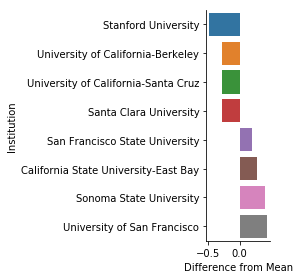

In [59]:
adm_ratio = sn.factorplot(y='INSTNM', x='ADM_RATIO', kind='bar', data=adm.sort_values(by='ADM_RATIO', ascending=True))
adm_ratio.set_axis_labels(x_var='Difference from Mean', y_var='Institution');